In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/world_population.csv')

In [3]:
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

Top Ten Most Populated Countries.

In [9]:
required_columns = ['Country/Territory', '2022 Population']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"CSV file must contain the columns: {required_columns}")
data['2022 Population'] = pd.to_numeric(data['2022 Population'], errors='coerce')

df = data.dropna(subset=['2022 Population'])
df_sorted = df.sort_values(by='2022 Population', ascending=False)


top_ten_countries = df_sorted.head(10)
print("\nTop Ten Most Populated Countries:")
print(top_ten_countries[['Country/Territory', '2022 Population']])


Top Ten Most Populated Countries:
    Country/Territory  2022 Population
41              China       1425887337
92              India       1417173173
221     United States        338289857
93          Indonesia        275501339
156          Pakistan        235824862
149           Nigeria        218541212
27             Brazil        215313498
16         Bangladesh        171186372
171            Russia        144713314
131            Mexico        127504125


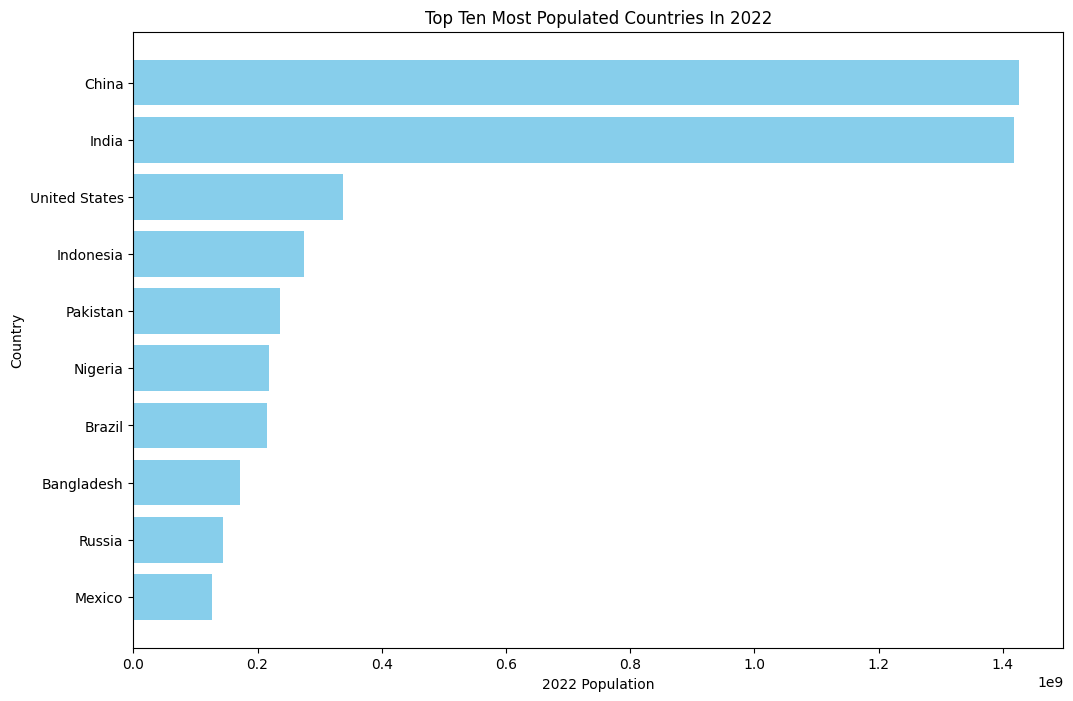

In [16]:
plt.figure(figsize=(12, 8))
plt.barh(top_ten_countries['Country/Territory'], top_ten_countries['2022 Population'], color='skyblue')
plt.xlabel('2022 Population')
plt.ylabel('Country')
plt.title('Top Ten Most Populated Countries In 2022')
plt.gca().invert_yaxis()
plt.show()

Top Ten Countries With Highest growth Rate


In [18]:
df['Growth Rate'] = pd.to_numeric(df['Growth Rate'], errors='coerce')
df = df.dropna(subset=['Growth Rate'])
df_sorted = df.sort_values(by='Growth Rate', ascending=False)


top_ten_countries = df_sorted.head(10)


print("\nTop Ten Countries with the Highest Growth Rates:")
print(top_ten_countries[['Country/Territory', 'Growth Rate']])


Top Ten Countries with the Highest Growth Rates:
    Country/Territory  Growth Rate
133           Moldova       1.0691
164            Poland       1.0404
148             Niger       1.0378
202             Syria       1.0376
189          Slovakia       1.0359
55           DR Congo       1.0325
130           Mayotte       1.0319
39               Chad       1.0316
5              Angola       1.0315
124              Mali       1.0314


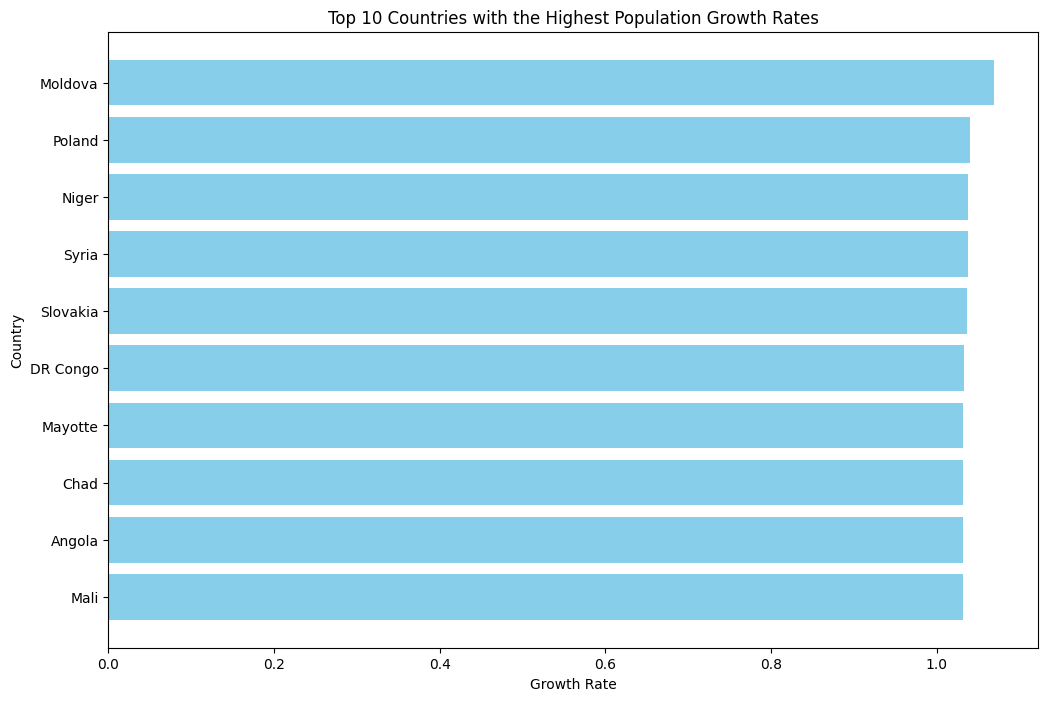

In [19]:
plt.figure(figsize=(12, 8))
plt.barh(top_ten_countries['Country/Territory'], top_ten_countries['Growth Rate'], color='skyblue')
plt.xlabel('Growth Rate')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Population Growth Rates')
plt.gca().invert_yaxis()
plt.show()

Countries With Least Population

In [21]:
required_columns = ['Country/Territory', '2022 Population']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"CSV file must contain the columns: {required_columns}")
data['2022 Population'] = pd.to_numeric(data['2022 Population'], errors='coerce')

df = data.dropna(subset=['2022 Population'])
df_sorted = df.sort_values(by='2022 Population', ascending=True)


top_ten_countries = df_sorted.head(10)
print("\nTop Ten Least Populated Countries:")
print(top_ten_countries[['Country/Territory', '2022 Population']])


Top Ten Least Populated Countries:
             Country/Territory  2022 Population
226               Vatican City              510
209                    Tokelau             1871
150                       Niue             1934
64            Falkland Islands             3780
137                 Montserrat             4390
177  Saint Pierre and Miquelon             5862
173           Saint Barthelemy            10967
216                     Tuvalu            11312
229          Wallis and Futuna            11572
142                      Nauru            12668


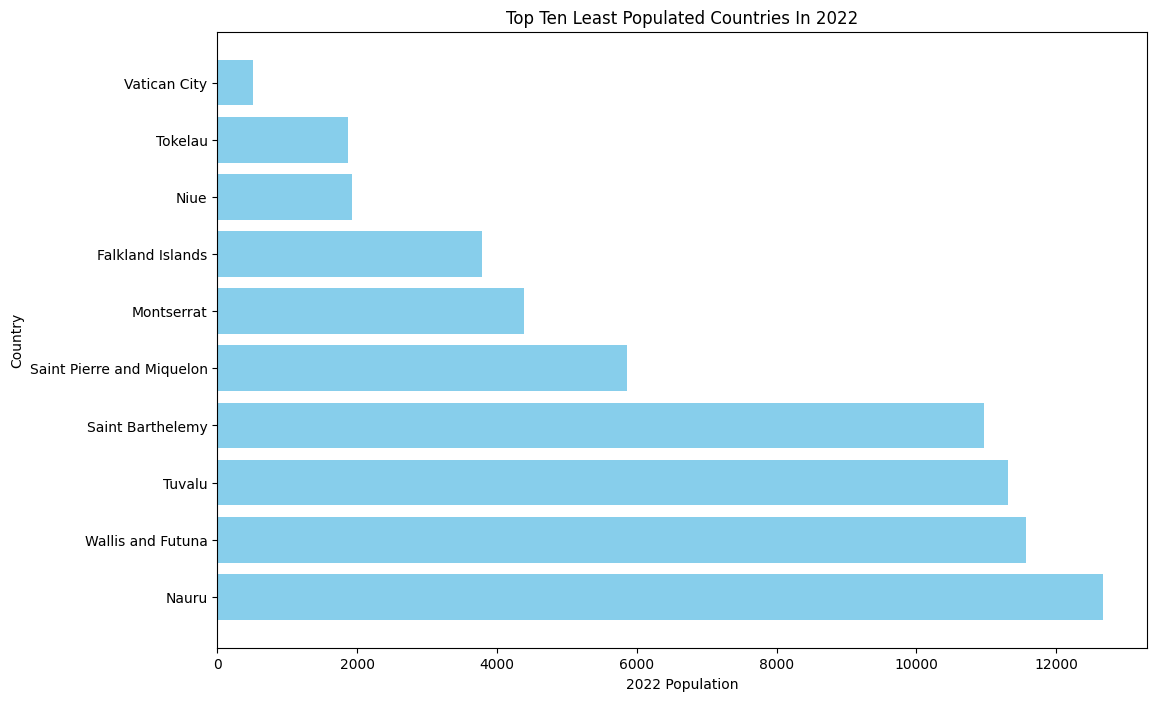

In [22]:
plt.figure(figsize=(12, 8))
plt.barh(top_ten_countries['Country/Territory'], top_ten_countries['2022 Population'], color='skyblue')
plt.xlabel('2022 Population')
plt.ylabel('Country')
plt.title('Top Ten Least Populated Countries In 2022')
plt.gca().invert_yaxis()
plt.show()

Population density Of Certain Countries

In [28]:
countries = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil']


filtered_df = df[df['Country/Territory'].isin(countries)]
print("Population Density of Selected Countries:")
for country in countries:
    density = filtered_df.loc[filtered_df['Country/Territory'] == country, 'Density (per km²)'].values[0]
    print(f"{country}: {density:.2f} people per square kilometer")

Population Density of Selected Countries:
China: 146.89 people per square kilometer
India: 431.07 people per square kilometer
United States: 36.09 people per square kilometer
Indonesia: 144.65 people per square kilometer
Pakistan: 267.40 people per square kilometer
Brazil: 25.28 people per square kilometer


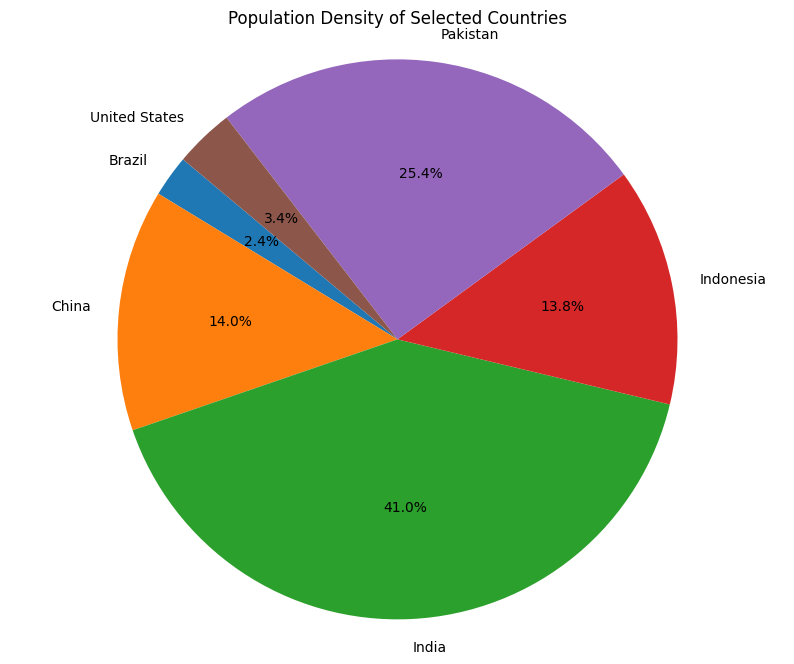

In [27]:
countries = ['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil']


filtered_df = df[df['Country/Territory'].isin(countries)]

plt.figure(figsize=(10, 8))
plt.pie(filtered_df['Density (per km²)'], labels=filtered_df['Country/Territory'], autopct='%1.1f%%', startangle=140)
plt.title('Population Density of Selected Countries')
plt.axis('equal')
plt.show()